In [6]:
# 📦 STEP 0: IMPORT LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# 📥 STEP 1: LOAD DATA
df = pd.read_excel("Case Study Data.xlsx")

# 🧹 STEP 2: DATA PREPARATION
df['Date'] = pd.to_datetime(df['Date'])
df['Weekday'] = df['Date'].dt.day_name()
df['Is_Weekday'] = df['Weekday'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday'])
df['Revenue (SAR)'] = df['ADR (SAR)'] * df['Occupancy (%)']

# ✅ Filter weekday data
weekday_df = df[df['Is_Weekday']]


C:\Users\Wasi Khan\AppData\Local\Temp\ipykernel_10112\2792554139.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=occupancy_by_property.values, y=occupancy_by_property.index, palette="viridis")


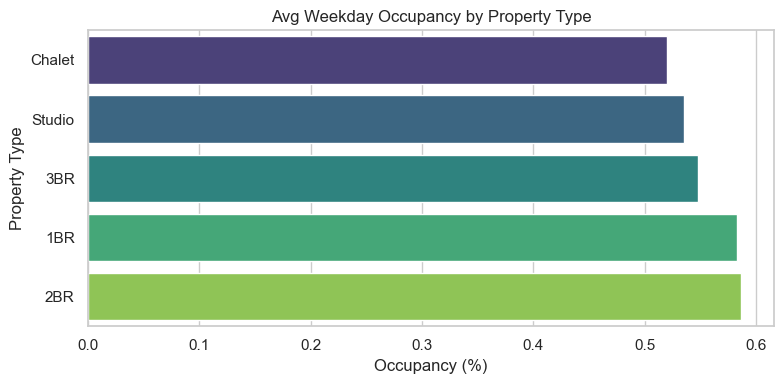

C:\Users\Wasi Khan\AppData\Local\Temp\ipykernel_10112\2792554139.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=occupancy_by_district.values, y=occupancy_by_district.index, palette="magma")


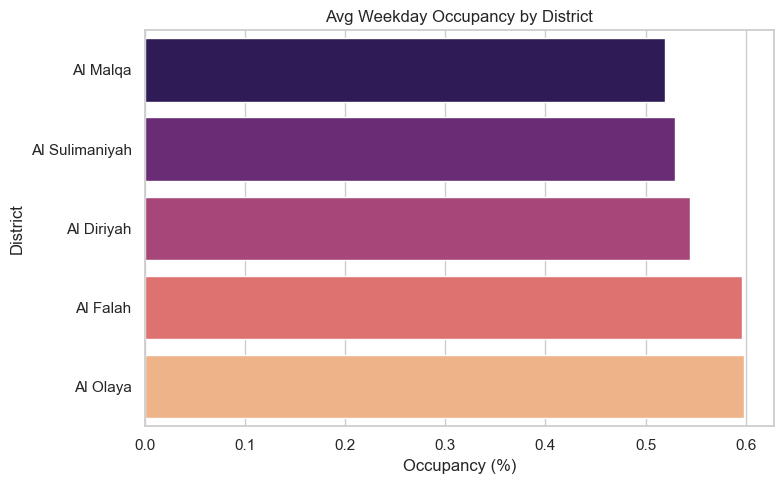

C:\Users\Wasi Khan\AppData\Local\Temp\ipykernel_10112\2792554139.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=occupancy_by_channel.values, y=occupancy_by_channel.index, palette="coolwarm")


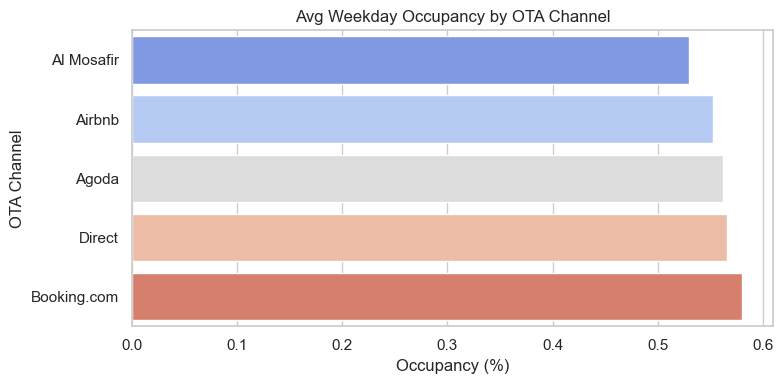

In [7]:
# 1️⃣ Average Occupancy by Property Type (Weekdays Only)
occupancy_by_property = weekday_df.groupby("Property Type")["Occupancy (%)"].mean().sort_values()

plt.figure(figsize=(8, 4))
sns.barplot(x=occupancy_by_property.values, y=occupancy_by_property.index, palette="viridis")
plt.title("Avg Weekday Occupancy by Property Type")
plt.xlabel("Occupancy (%)")
plt.ylabel("Property Type")
plt.tight_layout()
plt.show()

# 2️⃣ Average Occupancy by District
occupancy_by_district = weekday_df.groupby("District")["Occupancy (%)"].mean().sort_values()

plt.figure(figsize=(8, 5))
sns.barplot(x=occupancy_by_district.values, y=occupancy_by_district.index, palette="magma")
plt.title("Avg Weekday Occupancy by District")
plt.xlabel("Occupancy (%)")
plt.ylabel("District")
plt.tight_layout()
plt.show()

# 3️⃣ Average Occupancy by OTA Channel
occupancy_by_channel = weekday_df.groupby("OTA Channel")["Occupancy (%)"].mean().sort_values()

plt.figure(figsize=(8, 4))
sns.barplot(x=occupancy_by_channel.values, y=occupancy_by_channel.index, palette="coolwarm")
plt.title("Avg Weekday Occupancy by OTA Channel")
plt.xlabel("Occupancy (%)")
plt.ylabel("OTA Channel")
plt.tight_layout()
plt.show()


C:\Users\Wasi Khan\AppData\Local\Temp\ipykernel_10112\4136530827.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=adr_by_property.values, y=adr_by_property.index, palette="Blues_d")


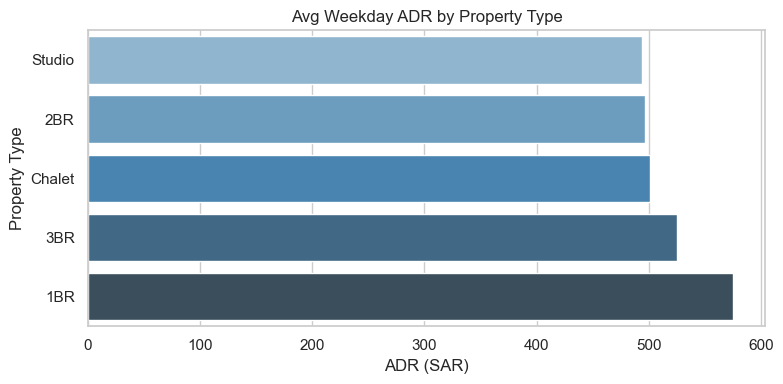

C:\Users\Wasi Khan\AppData\Local\Temp\ipykernel_10112\4136530827.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_by_district.values, y=revenue_by_district.index, palette="Greens_d")


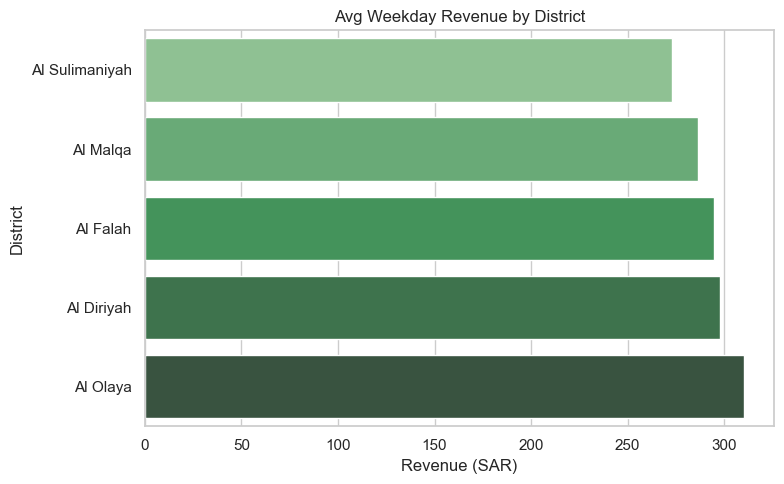

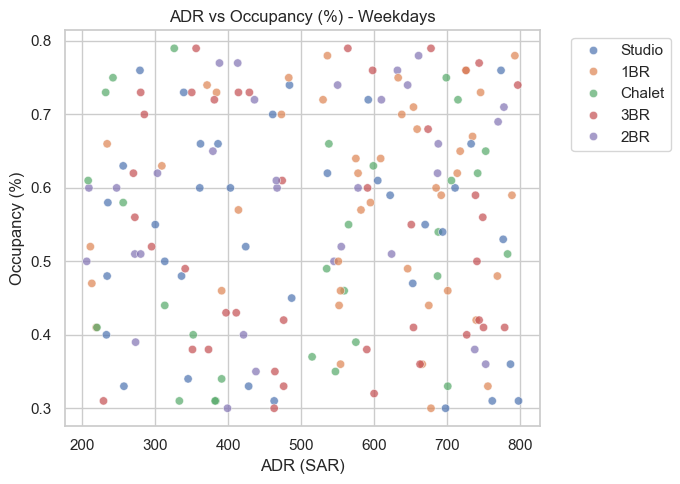

In [8]:
# 🧪 Task 3: ADR & Revenue Weekday Analysis

# 1️⃣ Average ADR by Property Type (Weekdays Only)
adr_by_property = weekday_df.groupby("Property Type")["ADR (SAR)"].mean().sort_values()

plt.figure(figsize=(8, 4))
sns.barplot(x=adr_by_property.values, y=adr_by_property.index, palette="Blues_d")
plt.title("Avg Weekday ADR by Property Type")
plt.xlabel("ADR (SAR)")
plt.ylabel("Property Type")
plt.tight_layout()
plt.show()

# 2️⃣ Average Revenue by District
revenue_by_district = weekday_df.groupby("District")["Revenue (SAR)"].mean().sort_values()

plt.figure(figsize=(8, 5))
sns.barplot(x=revenue_by_district.values, y=revenue_by_district.index, palette="Greens_d")
plt.title("Avg Weekday Revenue by District")
plt.xlabel("Revenue (SAR)")
plt.ylabel("District")
plt.tight_layout()
plt.show()

# 3️⃣ Scatter: ADR vs Occupancy (to identify pricing-occupancy relationship)
plt.figure(figsize=(7, 5))
sns.scatterplot(
    data=weekday_df,
    x="ADR (SAR)",
    y="Occupancy (%)",
    hue="Property Type",
    alpha=0.7
)
plt.title("ADR vs Occupancy (%) - Weekdays")
plt.xlabel("ADR (SAR)")
plt.ylabel("Occupancy (%)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
